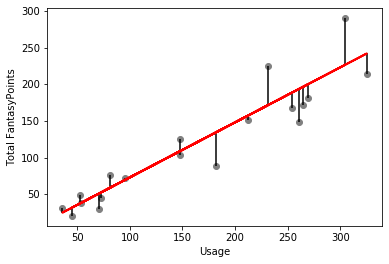

27.972685988249516
The coefficient of determination is 0.8627148089998887


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error
import math
import numpy as np
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
#import data
df2 = pd.read_csv('/Users/tylerchurch/Downloads/2019 (1).csv')

#drop col
df2.drop(['Rk', '2PM', '2PP', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb',
          'GS'], axis=1, inplace=True)
#name formatting
df2['Player']=df2['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])

#rename columns
df2.rename({'TD': 'PassingTD', 'TD.1': 'RushingTD', 'TD.2': 'ReceivingTD', 'TD.3': 'TotalTD', 'Yds': 'PassingYDs',
           'Yds.1': 'RushingYDs', 'Yds.2': 'ReceivingYDs', 'Att': 'PassingAtt', 'Att.1': 'RushingAtt'}, axis=1, inplace=True)

#seperate by position
rb_df = df2[df2['FantPos'] == 'RB']
qb_df = df2[df2['FantPos'] == 'QB']
wr_df = df2[df2['FantPos'] == 'WR']
te_df = df2[df2['FantPos'] == 'TE']

#seperate rushing and receiving
rushing_columns = ['RushingAtt', 'RushingTD', 'RushingYDs', 'Y/A']
receiving_columns = ['Tgt', 'Rec', 'ReceivingYDs', 'Y/R', 'ReceivingTD']

def transform_columns(df, new_column_list):
    df = df[['Player', 'Tm', 'Age', 'G', 'FantPt'] + new_column_list + ['FL']]
    return df

rb_df = transform_columns(rb_df, rushing_columns+receiving_columns)

#create FP columns
rb_df['FantasyPoints'] = (rb_df['RushingYDs']*0.1 + rb_df['RushingTD']*6 + rb_df['Rec']*0.5 + rb_df['ReceivingYDs']*0.1
+ rb_df['ReceivingTD']*6 - rb_df['FL']*2)

#create Usage column
rb_df['Total Usage'] = (rb_df['RushingAtt'] + rb_df['Tgt'])

#filter for > 20 rushes
rb_df = rb_df[rb_df['RushingAtt']>20]

#Machine Learning

#what data
x = rb_df['Total Usage'].values.reshape(-1,1)
y = rb_df['FantasyPoints'].values.reshape(-1,1)

#split our data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#fit and train data
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

#compare results
df = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df.head()

#visualize info
fig, ax = plt.subplots()
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
ax.vlines(x_test,y_test,y_pred)
plt.xlabel('Usage')
plt.ylabel('Total FantasyPoints')
plt.show()

mse= mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

#correlation coefficient
coeff_of_determination = r2_score(y_test, y_pred)
print('The coefficient of determination is', coeff_of_determination)





